In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coin_df = pd.read_csv("C:\\Users\\axeli\\Desktop\\Github\\crypto-trading\\BTCUSDT 5.csv").iloc[:, 3:]
#coin_df.resample('5T').mean().interpolate()
coin_df

,datetime,open,high,low,close
0,2020-02-17 11:25:00,9632.88,9658.14,9629.56,9658.14
1,2020-02-17 11:30:00,9658.14,9701.11,9658.06,9659.92
2,2020-02-17 11:35:00,9659.92,9664.66,9616.40,9616.46
3,2020-02-17 11:40:00,9616.46,9627.83,9588.07,9604.98
4,2020-02-17 11:45:00,9604.98,9620.65,9583.22,9620.37
...,...,...,...,...,...
255595,2022-07-23 17:25:00,22068.88,22158.97,22062.14,22145.07
255596,2022-07-23 17:30:00,22145.07,22145.07,22059.55,22083.22
255597,2022-07-23 17:35:00,22083.22,22115.94,22074.84,22098.50
255598,2022-07-23 17:40:00,22098.50,22104.99,22022.24,22029.50


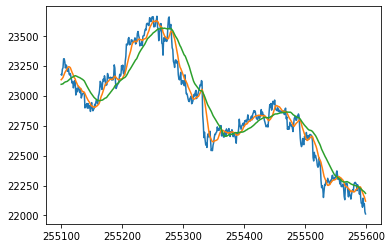

In [3]:
from ta.trend import SMAIndicator
from ta.volatility import AverageTrueRange

coin_df['SMA 12'] = SMAIndicator(coin_df['close'], 12).sma_indicator()
coin_df['SMA 36'] = SMAIndicator(coin_df['close'], 36).sma_indicator()

coin_df['ATR 144'] = AverageTrueRange(coin_df['high'], coin_df['low'],
                                      coin_df['close'], 144).average_true_range().replace(0, np.NaN)

coin_df['C - SMA 12'] = (coin_df['close'] - coin_df['SMA 12'])
coin_df['(C - SMA 12)/ATR 144'] = (coin_df['C - SMA 12']/coin_df['ATR 144']).shift()
coin_df['C - SMA 36'] = (coin_df['close'] - coin_df['SMA 36'])
coin_df['(C - SMA 36)/ATR 144'] = (coin_df['C - SMA 36']/coin_df['ATR 144']).shift()

coin_df['candle'] = np.where(coin_df['close'] > coin_df['open'], 1, 0)

plt.plot(coin_df['close'].iloc[-500:])
plt.plot(coin_df['SMA 12'].iloc[-500:])
plt.plot(coin_df['SMA 36'].iloc[-500:])

In [4]:
coin_df.iloc[30:45]

,datetime,open,high,low,close,SMA 12,SMA 36,ATR 144,C - SMA 12,(C - SMA 12)/ATR 144,C - SMA 36,(C - SMA 36)/ATR 144,candle
30,2020-02-17 13:55:00,9543.02,9548.83,9521.00,9531.19,9586.855000,NaN,NaN,-55.665000,NaN,NaN,NaN,0
31,2020-02-17 14:00:00,9531.19,9550.21,9507.78,9536.15,9577.416667,NaN,NaN,-41.266667,NaN,NaN,NaN,1
32,2020-02-17 14:05:00,9536.15,9536.21,9500.10,9503.33,9566.257500,NaN,NaN,-62.927500,NaN,NaN,NaN,0
33,2020-02-17 14:10:00,9503.33,9528.86,9477.29,9519.78,9556.750833,NaN,NaN,-36.970833,NaN,NaN,NaN,1
34,2020-02-17 14:15:00,9519.78,9519.78,9483.49,9492.03,9546.904167,NaN,NaN,-54.874167,NaN,NaN,NaN,0
35,2020-02-17 14:20:00,9492.03,9492.76,9455.35,9486.73,9537.576667,9599.349722,NaN,-50.846667,NaN,-112.619722,NaN,0
36,2020-02-17 14:25:00,9486.73,9499.92,9462.55,9477.34,9528.715833,9594.327500,NaN,-51.375833,NaN,-116.987500,NaN,0
37,2020-02-17 14:30:00,9477.34,9532.20,9465.50,9528.58,9523.888333,9590.679167,NaN,4.691667,NaN,-62.099167,NaN,1
38,2020-02-17 14:35:00,9528.58,9558.03,9517.31,9524.84,9522.147500,9588.134167,NaN,2.692500,NaN,-63.294167,NaN,0
39,2020-02-17 14:40:00,9524.84,9540.26,9506.40,9539.62,9521.079167,9586.318611,NaN,18.540833,NaN,-46.698611,NaN,1


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     coin_df.iloc[200:], coin_df['candle'].iloc[200:], test_size=0.1, shuffle = False)

rnd_clf = RandomForestClassifier(n_estimators = 250, max_leaf_nodes = 16, max_depth = 3)
rnd_clf.fit(X_train[['(C - SMA 12)/ATR 144', '(C - SMA 36)/ATR 144']], y_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=16, n_estimators=250)

In [6]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test[['(C - SMA 12)/ATR 144', '(C - SMA 36)/ATR 144']])
accuracy_score(y_test, y_pred)

0.5215740015661707

In [7]:
rnd_clf.feature_importances_

array([0.6511676, 0.3488324])

In [8]:
X_test['candle_pred'] = y_pred
X_test['candle'] = y_test
X_test

,datetime,open,high,low,close,SMA 12,SMA 36,ATR 144,C - SMA 12,(C - SMA 12)/ATR 144,C - SMA 36,(C - SMA 36)/ATR 144,candle,candle_pred
230060,2022-04-26 01:30:00,40536.56,40562.12,40498.58,40501.78,40566.121667,40474.080833,94.410846,-64.341667,-0.396893,27.699167,0.725344,0,1
230061,2022-04-26 01:35:00,40501.78,40507.29,40457.90,40488.25,40552.634167,40479.635000,94.098201,-64.384167,-0.681507,8.615000,0.293390,0,1
230062,2022-04-26 01:40:00,40488.25,40550.67,40487.86,40537.85,40546.682500,40484.645833,93.880922,-8.832500,-0.684223,53.204167,0.091553,1,1
230063,2022-04-26 01:45:00,40537.85,40558.55,40514.09,40528.04,40542.709167,40489.645556,93.537721,-14.669167,-0.094082,38.394444,0.566720,0,1
230064,2022-04-26 01:50:00,40528.04,40531.03,40466.76,40482.80,40534.262500,40493.664722,93.334473,-51.462500,-0.156826,-10.864722,0.410470,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255595,2022-07-23 17:25:00,22068.88,22158.97,22062.14,22145.07,22180.593333,22205.357500,55.796858,-35.523333,-2.200042,-60.287500,-2.507705,1,1
255596,2022-07-23 17:30:00,22145.07,22145.07,22059.55,22083.22,22165.886667,22200.987222,56.003269,-82.666667,-0.636655,-117.767222,-1.080482,0,1
255597,2022-07-23 17:35:00,22083.22,22115.94,22074.84,22098.50,22156.851667,22197.003056,55.899774,-58.351667,-1.476104,-98.503056,-2.102863,1,1
255598,2022-07-23 17:40:00,22098.50,22104.99,22022.24,22029.50,22137.945000,22190.558611,56.086234,-108.445000,-1.043862,-161.058611,-1.762137,0,1


In [9]:
pnl = np.where(X_test['candle'] == X_test['candle_pred'],
                    np.absolute(X_test['close'] - X_test['open']), -np.absolute(X_test['close'] - X_test['open']))
pnl

array([-34.78, -13.53,  49.6 , ...,  15.28, -69.  , -16.48])

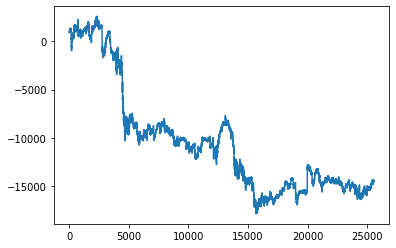

In [10]:
start_cap = 1000
backtest = [start_cap]

for o in pnl:
    backtest.append(backtest[-1] + o)

plt.plot(backtest)